In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from igraph import Graph, plot

Bridges: [(0, 11), (0, 12), (0, 15), (0, 18), (0, 37), (0, 43), (0, 74), (0, 114), (0, 209), (0, 210), (0, 215), (0, 287), (0, 292), (0, 335), (107, 911), (107, 918), (107, 1096), (107, 1119), (107, 1145), (107, 1206), (107, 1386), (107, 1466), (107, 1560), (107, 1581), (107, 1834), (348, 358), (348, 447), (348, 550), (414, 585), (414, 602), (414, 607), (414, 608), (414, 613), (414, 624), (414, 638), (414, 668), (414, 674), (1684, 2842), (1684, 3031), (1684, 3071), (1684, 3183), (1684, 3230), (1912, 2079), (1912, 2195), (1912, 2269), (1912, 2457), (1912, 2470), (1912, 2569), (1912, 2596), (3437, 3451), (3437, 3453), (3437, 3570), (3437, 3650), (3437, 3709), (3437, 3729), (3437, 3748), (3437, 3798), (3437, 3820), (3437, 3853), (3437, 3856), (3437, 3935), (3437, 3974), (3980, 3984), (3980, 4008), (3980, 4010), (3980, 4015), (3980, 4022), (3980, 4024), (3980, 4035), (686, 692), (686, 801), (698, 875), (698, 883), (698, 891), (698, 892)]
Graph Density: 0.0054
The graph is sparse.
Node with

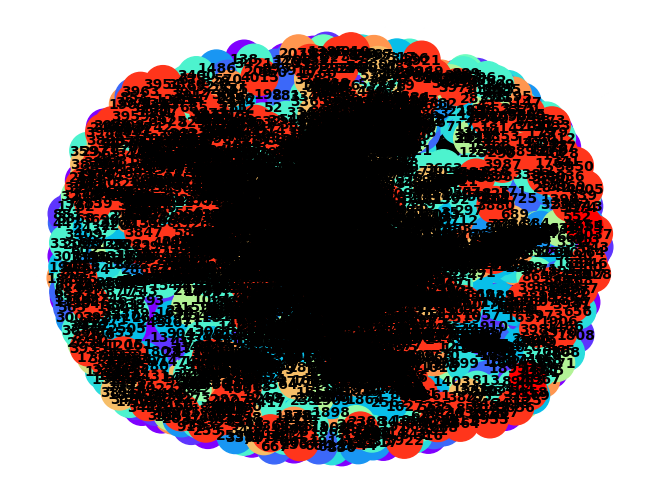

In [6]:
# Read the connections.txt file
with open('connections.txt', 'r') as file:
    lines = file.readlines()

# Create a directed graph
graph = nx.DiGraph()

for line in lines:
    edge = line.strip().split()
    source, target = map(int, edge)
    graph.add_edge(source, target)

# Task 2: Identify and print bridges
undirected_graph = graph.to_undirected()
bridges = list(nx.bridges(undirected_graph))
print("Bridges:", bridges)

# Task 3: Calculate and print the density of the graph
num_nodes = len(graph.nodes())
num_edges = len(graph.edges())
density = nx.density(graph)

# Print the density and comments about the findings
print(f"Graph Density: {density:.4f}")
if density == 0:
    print("The graph is empty.")
elif density == 1:
    print("The graph is complete (fully connected).")
elif density > 0 and density < 1:
    print("The graph is sparse.")
else:
    print("Error: Invalid density value.")

# Task 4: Identify nodes with the highest and lowest number of connections
node_degrees = dict(graph.degree())
max_degree_node = max(node_degrees, key=node_degrees.get)
min_degree_node = min(node_degrees, key=node_degrees.get)

print(f"Node with the highest degree: {max_degree_node}, Degree: {node_degrees[max_degree_node]}")
print(f"Node with the lowest degree: {min_degree_node}, Degree: {node_degrees[min_degree_node]}")

# Task 5: Calculate and print centrality measures
closeness_centrality = nx.closeness_centrality(graph)
betweenness_centrality = nx.betweenness_centrality(graph)
try:
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000, tol=1e-6)
except nx.PowerIterationFailedConvergence as e:
    print("Eigenvector centrality calculation failed to converge:", e)

max_closeness_node = max(closeness_centrality, key=closeness_centrality.get)
max_betweenness_node = max(betweenness_centrality, key=betweenness_centrality.get)
max_eigenvector_node = max(eigenvector_centrality, key=eigenvector_centrality.get)

print(f"Node with the highest closeness centrality: {max_closeness_node}, Closeness Centrality: {closeness_centrality[max_closeness_node]:.4f}")
print(f"Node with the highest betweenness centrality: {max_betweenness_node}, Betweenness Centrality: {betweenness_centrality[max_betweenness_node]:.4f}")
print(f"Node with the highest eigenvector centrality: {max_eigenvector_node}, Eigenvector Centrality: {eigenvector_centrality[max_eigenvector_node]:.4f}")

# Task 6: Implement community detection algorithm using Louvain method from igraph
ig_graph = Graph.TupleList(undirected_graph.edges(), directed=False)
membership = ig_graph.community_multilevel().membership
partition = {node: membership[node] for node in graph.nodes()}

# Count the number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities: {num_communities}")

# Task 7: Identify the largest and smallest community
community_sizes = [list(partition.values()).count(i) for i in set(partition.values())]
largest_community = max(community_sizes)
smallest_community = min(community_sizes)

print(f"Largest community size: {largest_community}")
print(f"Smallest community size: {smallest_community}")

# Task 8: Visualize the graph with communities highlighted
pos = nx.spring_layout(graph)
colors = [partition[node] for node in graph.nodes()]
nx.draw(graph, pos, with_labels=True, node_size=700, node_color=colors, cmap=plt.cm.rainbow, font_size=10, font_color='black', font_weight='bold', arrowsize=20)

# Highlight nodes with the highest degree, centrality measures in red
highlighted_nodes = [max_degree_node, min_degree_node, max_closeness_node, max_betweenness_node, max_eigenvector_node]
nx.draw_networkx_nodes(graph, pos, nodelist=highlighted_nodes, node_color='red', node_size=700)

# Display the graph with highlighted nodes
plt.show()

In summary, these centrality measures highlight nodes with different types of importance in the network. Node 2642 is centrally located in terms of proximity, Node 1684 acts as a key intermediary, and Node 2655 is influential due to its well-connected neighbors. Understanding these central nodes is valuable for network analysis and decision-making in various contexts, such as identifying key individuals in a social network or important routers in a communication network.

**Largest Community Size**

The largest community consists of 605 nodes, suggesting a significant cohesive group within the network.
This community is likely to have strong internal connections, indicating a densely connected subgroup of nodes.
Large communities may represent cohesive social groups, functional units, or tightly interconnected components in the network.


**Smallest Community Size**

The smallest community consists of 19 nodes, indicating a relatively smaller and potentially more specialized subgroup.
Smaller communities might represent niche interests, specific roles, or distinct functional components in the network.
It's possible that this community has a specific purpose or plays a unique role within the larger network.

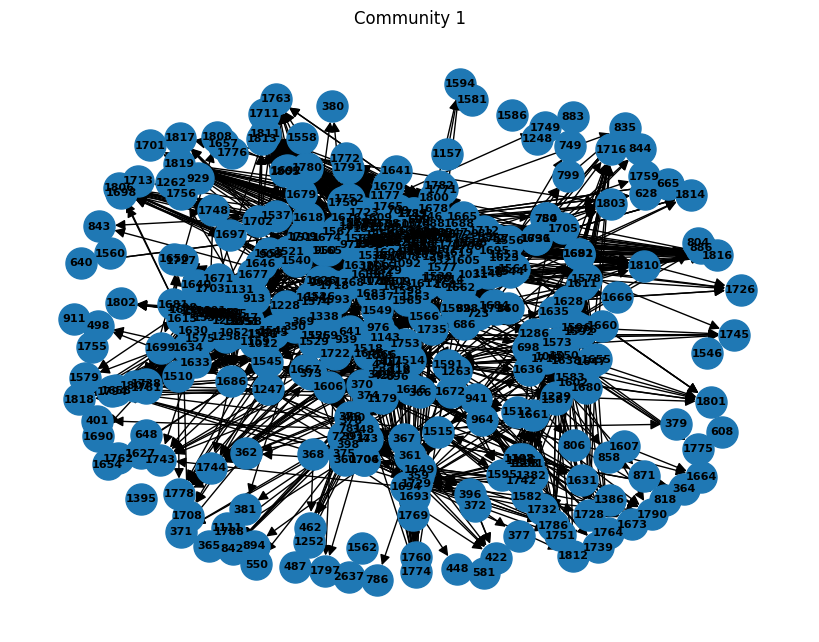

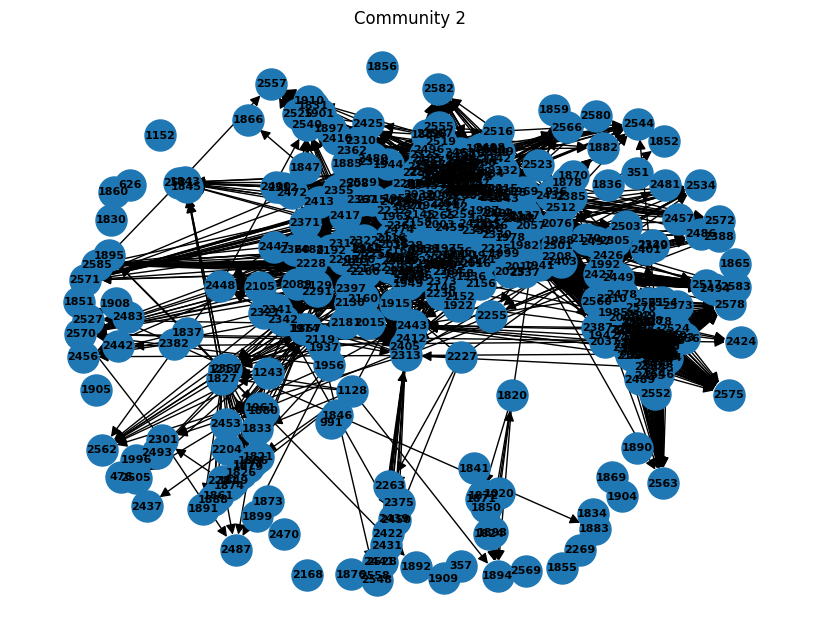

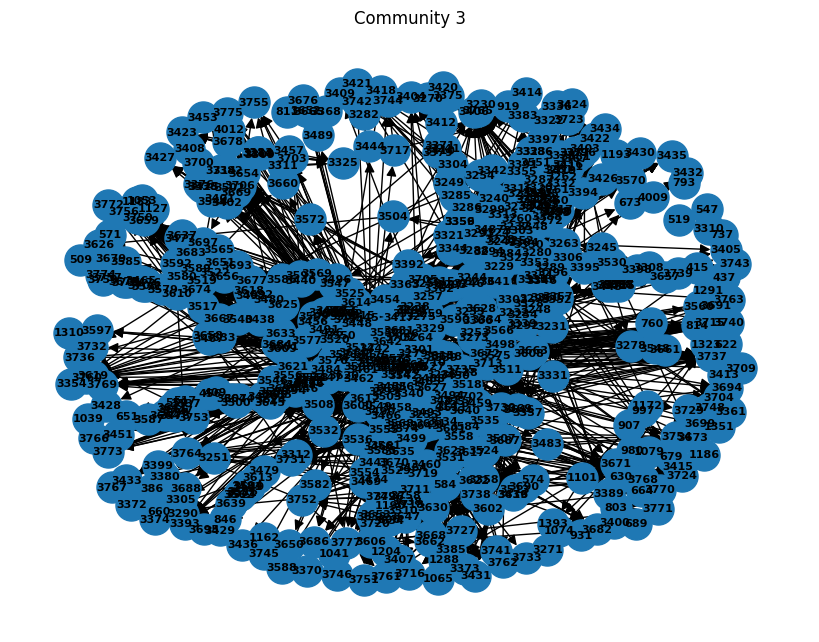

In [7]:
# Extract the largest three communities
largest_communities = sorted(community_sizes, reverse=True)[:3]
selected_communities = [community for community, size in enumerate(community_sizes) if size in largest_communities]

# Create subgraph for each selected community
subgraphs = [graph.subgraph([node for node, part in partition.items() if part == community]) for community in selected_communities]

# Draw the subgraphs
for i, subgraph in enumerate(subgraphs):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(subgraph)
    nx.draw(subgraph, pos, with_labels=True, node_size=500, font_size=8, font_color='black', font_weight='bold', arrowsize=15)
    plt.title(f"Community {i+1}")
    plt.show()


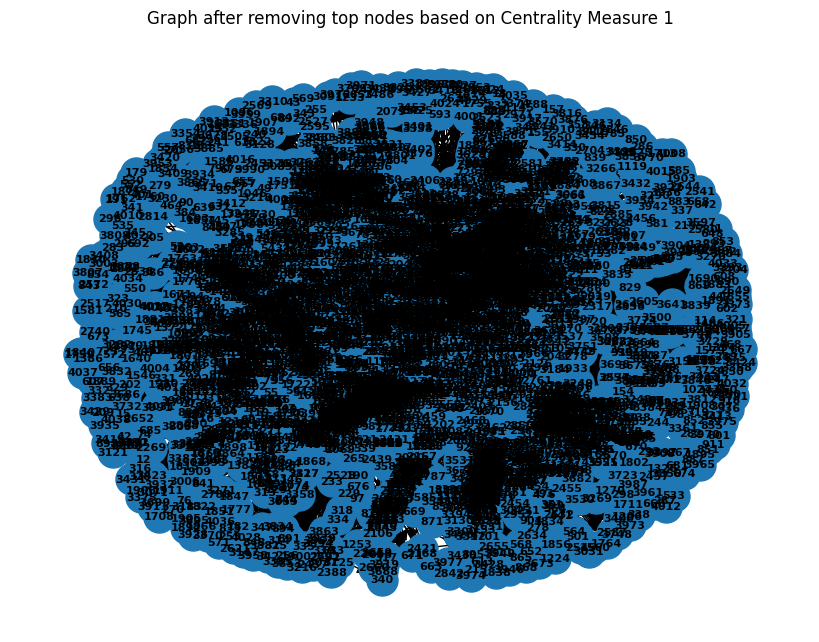

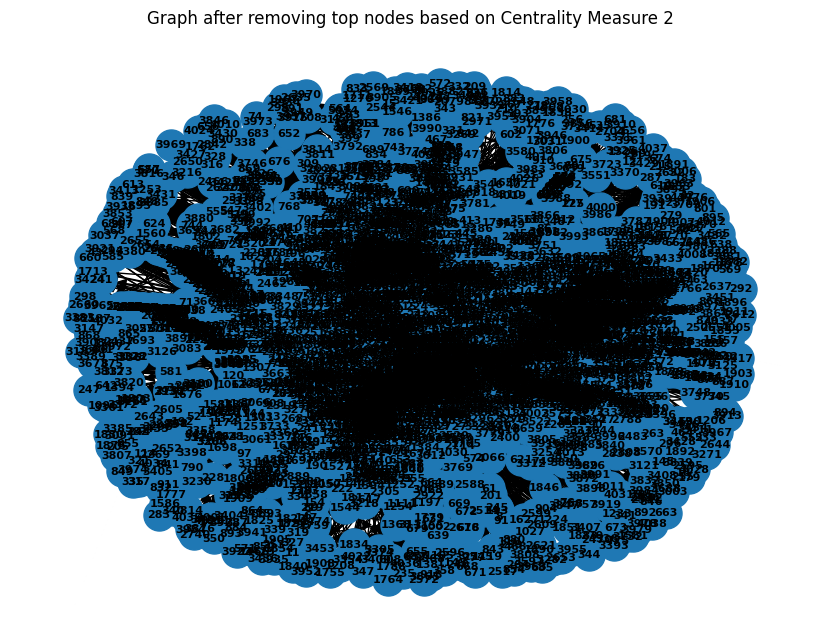

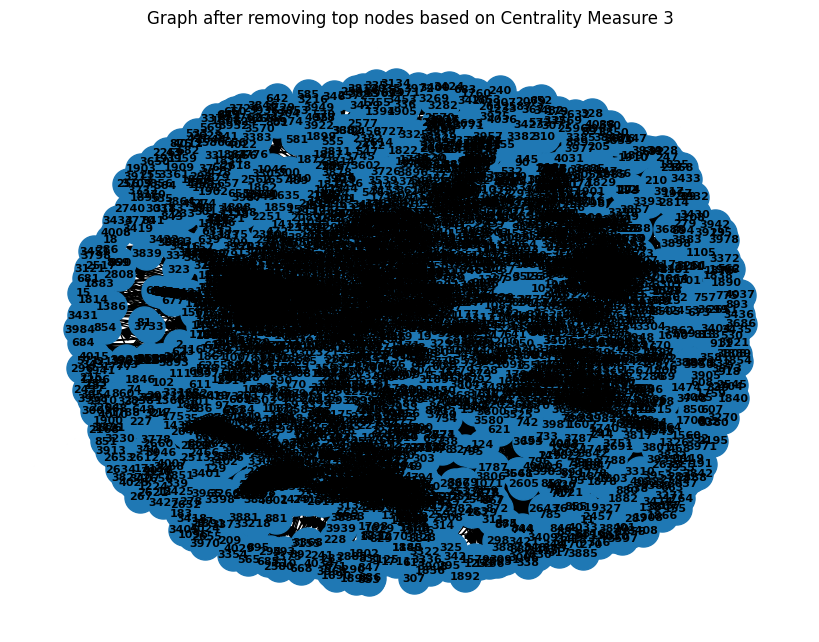

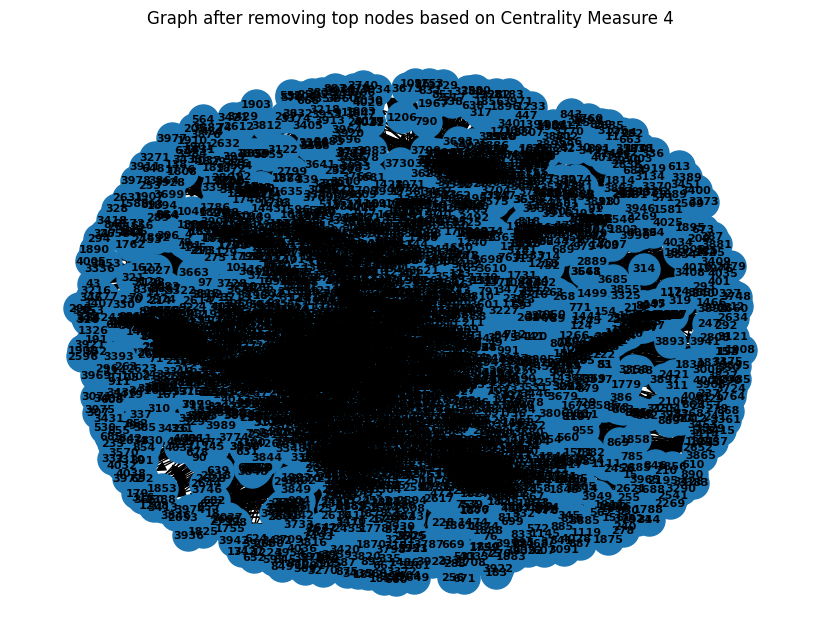

In [9]:
# Function to remove top n nodes based on centrality measure
def remove_top_nodes(graph, centrality_measure, n):
    centrality_values = centrality_measure(graph)
    top_nodes = sorted(centrality_values, key=centrality_values.get, reverse=True)[:n]
    graph_removed_nodes = graph.copy()
    graph_removed_nodes.remove_nodes_from(top_nodes)
    return graph_removed_nodes

# Top 3 nodes based on each centrality measure
top_degree_nodes = sorted(graph.degree(), key=lambda x: x[1], reverse=True)[:3]
top_closeness_nodes = sorted(nx.closeness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:3]

try:
    top_eigenvector_nodes = sorted(nx.eigenvector_centrality(graph, max_iter=1000).items(), key=lambda x: x[1], reverse=True)[:3]
except nx.PowerIterationFailedConvergence as e:
    print(f"Eigenvector centrality calculation failed to converge: {e}")
    top_eigenvector_nodes = []

top_betweenness_nodes = sorted(nx.betweenness_centrality(graph).items(), key=lambda x: x[1], reverse=True)[:3]

# Draw the subgraphs after removing top nodes for each centrality measure
for i, top_nodes in enumerate([top_degree_nodes, top_closeness_nodes, top_betweenness_nodes, top_eigenvector_nodes]):
    plt.figure(figsize=(8, 6))
    graph_removed_nodes = graph.copy()
    graph_removed_nodes.remove_nodes_from([node for node, _ in top_nodes])
    pos = nx.spring_layout(graph_removed_nodes)
    nx.draw(graph_removed_nodes, pos, with_labels=True, node_size=500, font_size=8, font_color='black', font_weight='bold', arrowsize=15)
    plt.title(f"Graph after removing top nodes based on Centrality Measure {i+1}")
    plt.show()

## **Action Plan for a Telecom Company Marketing Campaign**

**Hypothetical Business** Telecom Company

**Hypothetical Marketing Budget** $100,000

**Hypothetical Cost Per Action (Advertisement Cost)** $1 per click

**Identify Bridges**

Target individuals in bridge positions identified in the network (e.g., (0, 11), (0, 12), etc.).


**Graph Density Analysis**

Acknowledge the sparse graph with a density of 0.0054. Implement targeted efforts to efficiently reach specific nodes.

**Degree Centrality**
Prioritize nodes with high degree centrality (e.g., Node 107 with a degree of 1045). These nodes have numerous connections and can amplify the reach of marketing messages.

**Closeness Centrality**
Target centrally located nodes with high closeness centrality (e.g., Node 2642 with 0.1180). These nodes efficiently spread information to other network nodes.

**Betweenness Centrality**

Focus on nodes with high betweenness centrality (e.g., Node 1684 with 0.0330). These nodes act as critical bridges, influencing communication in the network.

**Eigenvector Centrality**

Include nodes with high eigenvector centrality (e.g., Node 2655 with 0.8027). These nodes are influential due to the quantity and quality of their connections.

**Community Detection**

Prioritize the largest community in the network (605 nodes) for targeted marketing efforts. Tailor messages to suit the characteristics of the diverse communities.

**Smallest Community**

Explore opportunities within the smallest community of 19 nodes. Tailor messaging for this potentially specialized subgroup.

**Action Steps**

Allocate a significant portion of the budget to target influential nodes and bridges.
Develop content that resonates with the characteristics of identified communities.
Monitor and analyze engagement, click-through rates, and conversions for insights.
Continuously adapt the marketing strategy based on real-time feedback and analytics.
Adjust budget allocations based on the effectiveness of campaigns within different communities.